## Problem definition
Will a customer make a puchase or not?

## Data 
The data is from https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset/data

## Evaluating 
The accuracy should be 90%

## Feature 
1. Age: Customer's age
2. Gender: Customer's gender (0: Male, 1: Female)
3. Annual Income: Annual income of the customer in dollars
4. Number of Purchases: Total number of purchases made by the customer
5. Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)
6. Time Spent on Website: Time spent by the customer on the website in minutes
7. Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)
8. Discounts Availed: Number of discounts availed by the customer (range: 0-5)
9. PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)

In [43]:
#Importing coding library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
%matplotlib inline

#importing models
from  sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#Import functions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report,auc
from sklearn.metrics import precision_score,recall_score,f1_score, RocCurveDisplay,roc_curve

In [2]:
df=pd.read_csv("Data/customer_purchase_data.csv")

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [7]:
df.isna().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [9]:
df.shape

(1500, 9)

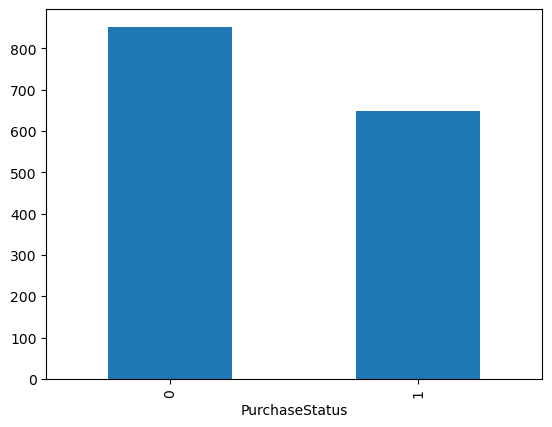

In [15]:
df.PurchaseStatus.value_counts().plot(kind="bar");

In [17]:
pd.crosstab(df.Age, df.NumberOfPurchases)

NumberOfPurchases,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,,
18,2,1,1,0,1,5,4,0,0,2,...,1,2,1,3,3,0,1,1,2,1
19,2,2,0,0,2,1,0,1,0,1,...,2,3,2,2,0,1,3,0,4,4
20,1,1,2,0,2,1,1,1,0,2,...,1,4,1,2,1,1,2,1,3,1
21,1,0,0,1,1,0,0,0,1,2,...,3,0,0,3,1,2,3,1,1,0
22,1,1,12,0,1,0,3,0,0,1,...,0,1,2,1,1,4,2,1,1,2
23,1,1,1,2,0,2,1,0,2,0,...,1,1,3,1,2,2,3,2,0,0
24,0,0,1,0,1,1,1,1,2,0,...,4,0,3,0,1,3,1,0,3,0
25,3,3,1,0,2,1,2,2,2,0,...,1,1,0,3,2,1,1,3,0,3
26,0,2,1,2,1,0,0,5,0,3,...,2,2,0,1,1,1,2,1,1,0


## Modelling

We will be trying with these model:
* NuSVC
* DecisionTreeClassifier
* GradientBoostingClassifier
* RandomForestClassifier
* LogisticRegression

In [21]:
#Creating the data 
X=df.drop('PurchaseStatus',axis=1)
y=df['PurchaseStatus']

np.random.seed(42)
#Spliting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
#Making a function
models={"NuSVC":NuSVC(),
      "DecisionTreeClassifier":DecisionTreeClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        "RandomForestClassifier":RandomForestClassifier(),
        "LogisticRegression":LogisticRegression()}
#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models. 
    model:a dict of diiferent Scikit-learn models
    X_train:training data(no label)
    X_test:testing data(no labels)
    y_train:training label
    y_test: test labels
    """
    #Setup a random seed
    np.random.seed(42)

    #Make a dictionary to keep model scores
    model_scores={}
    # Loop through model
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append it score model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [37]:
model_score=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_score

/Users/avnay/Desktop/ML_course/Predict-customer-spending-habit/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'NuSVC': 0.47333333333333333,
 'DecisionTreeClassifier': 0.8966666666666666,
 'GradientBoostingClassifier': 0.9433333333333334,
 'RandomForestClassifier': 0.9433333333333334,
 'LogisticRegression': 0.74}

In [40]:
model_comparision=pd.DataFrame(model_score,index=['accuracy'])
model_comparision

,NuSVC,DecisionTreeClassifier,GradientBoostingClassifier,RandomForestClassifier,LogisticRegression
accuracy,0.473333,0.896667,0.943333,0.943333,0.74


In [58]:
cv_pre=cross_val_score(GradientBoostingClassifier,X,y,scoring='precision')
cv_pre.mean()

0.9295347282560454

In [57]:
cv_recall=cross_val_score(GradientBoostingClassifier,X,y,scoring='precision')
cv_recall.mean()

0.9295347282560454

In [56]:
cv_F1=cross_val_score(GradientBoostingClassifier,X,y,scoring='f1')
cv_F1.mean()

0.9110229197099164

In [53]:
cv_pre=cross_val_score(RandomForestClassifier,X,y,scoring='precision')
cv_pre.mean()

0.9452167577413478

In [54]:
cv_recall=cross_val_score(RandomForestClassifier,X,y,scoring='precision')
cv_recall.mean()

0.9452167577413478

In [55]:
cv_F1=cross_val_score(GradientBoostingClassifier,X,y,scoring='f1')
cv_F1.mean()

0.9110229197099164

I think the best model is RandomForestClassifier